OK - Database found
Found 87 files belonging to 2 classes.
Using 70 files for training.
Found 87 files belonging to 2 classes.
Using 17 files for validation.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5571 - loss: 1.2517 - val_accuracy: 0.7059 - val_loss: 0.5510
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 527ms/step - accuracy: 0.5714 - loss: 1.0855 - val_accuracy: 0.7059 - val_loss: 0.5314
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step - accuracy: 0.5571 - loss: 0.9854 - val_accuracy: 0.5882 - val_loss: 0.5151
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.5286 - loss: 1.0374 - val_accuracy: 0.7059 - val_loss: 0.5016
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.5429 - loss: 1.1178 - val_accuracy: 0.7647 - val_loss: 0.4911
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.5714 - loss: 0.9956 - val_accuracy: 0.7647 - val_loss: 0.4840
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - accuracy: 0.5857 - loss: 0.8426 - val_accuracy: 0.7647 - val_loss: 0.4803
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.6000 - loss: 0.7932 - val_accuracy: 0.7647 - val_loss: 0

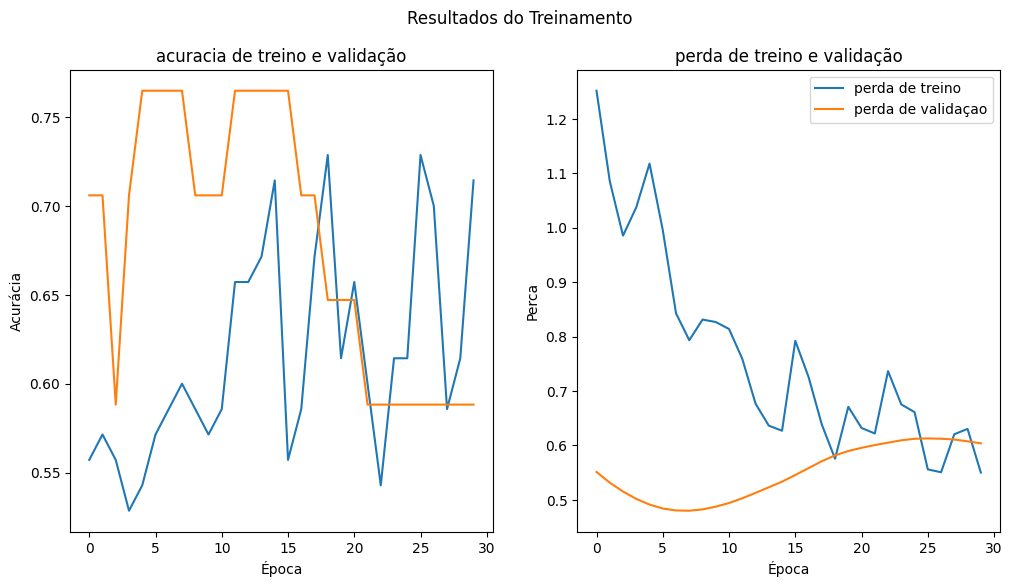

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.src.applications.densenet import preprocess_input
from tensorflow.python.data import AUTOTUNE
from tensorflow.python.keras.utils.version_utils import training


# way for archive of the images
database_photos = 'imagem-treino'

# check if database is true
if os.path.isdir(database_photos):
    print("OK - Database found")
else:
    print("ERROR - Database not found")



# parameter for the load the images
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH  = 224
EPOCHS     = 30 
NAME_MODEL = 'My_models_IA_THOR.keras'


# load the training data  ( 80% of the images)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    database_photos,
    validation_split= 0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE)

#load the validation data (20% of the images)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    database_photos,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)


# get the class names
class_names = train_dataset.class_names

AUTOTUNE  = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = tf.keras.Sequential({
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
})

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights="imagenet")

base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(1)(x)


model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)


model.save(rf'model\\{NAME_MODEL}')
print(f"\n✅'My model save with success = {NAME_MODEL}") 

# visualizar
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Acuracia de treino")
plt.plot(epochs_range, val_acc, label="acuracia de validação")
plt.plot(loc='lower right')
plt.title('acuracia de treino e validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="perda de treino")
plt.plot(epochs_range, val_loss, label="perda de validaçao")
plt.legend(loc="upper right")
plt.title("perda de treino e validação")
plt.xlabel('Época')
plt.ylabel('Perca')

plt.suptitle('Resultados do Treinamento')
plt.savefig(r'model\\grafico_treino.png')
plt.show()